In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

In [2]:
# 파일 다운로드

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-03-20 09:07:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.2.112, 172.217.0.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   213MB/s    in 0.3s    

2022-03-20 09:07:42 (213 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import shutil

if os.path.exists('/content/cats_and_dogs_filtered/'):    # 작업 디렉토리는 cats_and_dogs_filtered
    
    shutil.rmtree('/content/cats_and_dogs_filtered/')
    print('/content/cats_and_dogs_filtered/  is removed !!!')

In [4]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/') 

In [5]:
# 데이터 전체 개수 확인

import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

cats_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats')
dogs_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs')
cats_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats')
dogs_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs')

print('cats train file nums = ', len(cats_train_list))
print('dogs train file nums = ', len(dogs_train_list))
print('cats validation file nums = ', len(cats_validation_list))
print('dogs validation file nums = ', len(dogs_validation_list))
print('=================================================')

cats train file nums =  1000
dogs train file nums =  1000
cats validation file nums =  500
dogs validation file nums =  500


In [6]:
train_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train'
test_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation'

In [7]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

train 디렉토리에서 image data 읽어서 x_train, y_train 생성

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=10,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [9]:
train_data = train_data_gen.flow_from_directory(directory=train_dir,
                                  batch_size=32,
                                  color_mode='rgb',
                                  shuffle=True,
                                  target_size=(IMG_WIDTH,IMG_HEIGHT),
                                  class_mode='categorical')
test_data = test_data_gen.flow_from_directory(directory=test_dir,
                                  batch_size=32,
                                  color_mode='rgb',
                                  shuffle=True,
                                  target_size=(IMG_WIDTH,IMG_HEIGHT),
                                  class_mode='categorical')

print('==========train==========')
print(train_data.class_indices)
print(train_data.num_classes)
print(len(train_data.classes))

print('==========test==========')
print(test_data.class_indices)
print(test_data.num_classes)
print(len(test_data.classes))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
==========train==========
{'cats': 0, 'dogs': 1}
2
2000
==========test==========
{'cats': 0, 'dogs': 1}
2
1000


## TO-DO

In [10]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet, ResNet50, InceptionV3, Xception

# MobileNet

In [11]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
mobilenet.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

## Model summary

In [12]:
model = Sequential()

model.add(mobilenet)
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 16)                802832    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 4,031,730
Trainable params: 4,009,842
Non-trainable params: 21,888
_________________________________________

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './cats_and_dogs_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist = model.fit(train_data,
                 epochs=10,
                 validation_data=test_data)

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
63/63 [==============================] - 44s 499ms/step - loss: 0.5419 - acc: 0.7465 - val_loss: 0.1778 - val_acc: 0.9440
Epoch 2/10
63/63 [==============================] - 31s 498ms/step - loss: 0.2280 - acc: 0.9065 - val_loss: 0.0890 - val_acc: 0.9750
Epoch 3/10
63/63 [==============================] - 31s 485ms/step - loss: 0.1785 - acc: 0.9365 - val_loss: 0.0712 - val_acc: 0.9790
Epoch 4/10
63/63 [==============================] - 31s 487ms/step - loss: 0.1285 - acc: 0.9540 - val_loss: 0.0578 - val_acc: 0.9770
Epoch 5/10
63/63 [==============================] - 31s 484ms/step - loss: 0.0941 - acc: 0.9615 - val_loss: 0.0597 - val_acc: 0.9780
Epoch 6/10
63/63 [==============================] - 31s 487ms/step - loss: 0.0930 - acc: 0.9630 - val_loss: 0.0479 - val_acc: 0.9780
Epoch 7/10
63/63 [==============================] - 31s 489ms/step - loss: 0.0905 - acc: 0.9660 - val_loss: 0.0534 - val_acc: 0.9780
Epoch 8/10
63/63 [==============================] - 31s 485ms/step - 

## Accuracy

In [14]:
model.evaluate(test_data)

32/32 [==============================] - 3s 103ms/step - loss: 0.0421 - acc: 0.9820


[0.04209958761930466, 0.9819999933242798]

## Graph

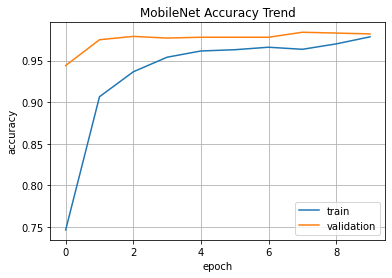

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('MobileNet Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

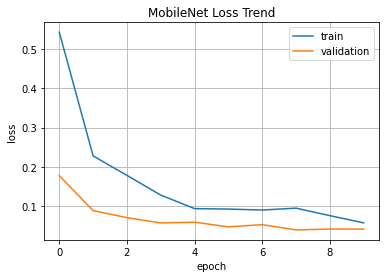

In [16]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('MobileNet Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# 임의의 이미지 넣기

In [17]:
with zipfile.ZipFile('/content/cats_and_dogs_sample.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample') 

In [18]:
import cv2
import glob

test_img_list = []

test_img_name_list = glob.glob('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/*/*.jpg')

for i in range(len(test_img_name_list)):
    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))

    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    dst_img = dst_img / 255.0

    test_img_list.append(dst_img)

print(test_img_name_list)
print(len(test_img_list))

['/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.125.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.222.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.123.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.5411.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.3.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.4.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.1555.jpg', '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.6331.jpg']
8


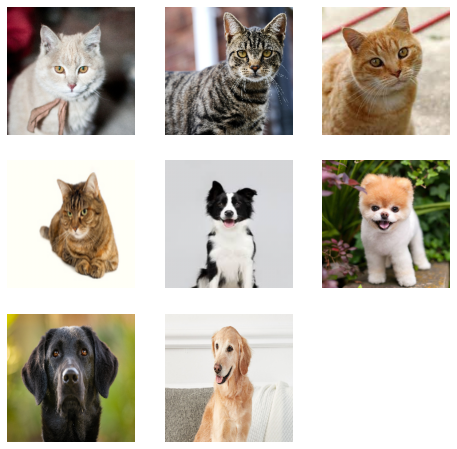

In [19]:
plt.figure(figsize=(8,8))

for i in range(len(test_img_list)):

    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.imshow(test_img_list[i])

plt.show()

In [20]:
import numpy as np

x_test = np.array(test_img_list)

In [21]:
test_img_name_list

['/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.125.jpg',
 '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.222.jpg',
 '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.123.jpg',
 '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/cats/cat.5411.jpg',
 '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.3.jpg',
 '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.4.jpg',
 '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.1555.jpg',
 '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/sample/dogs/dog.6331.jpg']

In [22]:
class_name = ['cat','dog']

pred = model.predict(x_test)

print(pred.shape)
print(pred)

(8, 2)
[[1.00000000e+00 1.16345005e-08]
 [9.99927521e-01 7.24183701e-05]
 [9.99999881e-01 1.06073088e-07]
 [9.99999523e-01 5.05637672e-07]
 [4.28408093e-04 9.99571621e-01]
 [1.35310006e-03 9.98646915e-01]
 [1.16233672e-08 1.00000000e+00]
 [1.16677829e-05 9.99988317e-01]]


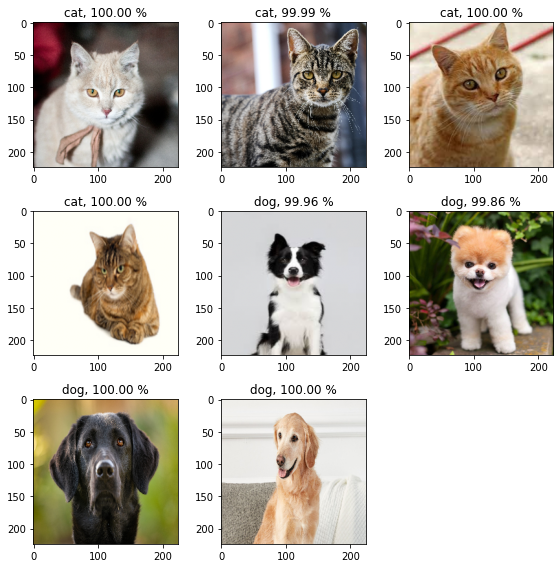

In [23]:
class_name = ['cat','dog']


plt.figure(figsize=(8,8))

for i in range(len(pred)):
    plt.subplot(3,3,i+1)
    plt.xticks()
    plt.yticks()

    prediction = class_name[np.argmax(pred[i])]
    probability = '{0:0.2f}'.format(100*max(pred[i]))
   
    title_str = prediction + ', '+ probability + ' %'
    plt.title(title_str)
    plt.imshow(test_img_list[i])

plt.tight_layout()
plt.show()